**Importing all the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
!pip install autocorrect
from autocorrect import Speller
!pip install squarify
import squarify
from textblob import TextBlob
from PIL import Image





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=9911528dd5e5b14127f19245a05e5d7984b7daa833a597286c0195d622d4d8f5
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


**Choosing categories that different from each other and not from the same niche**

In [ ]:
cats = ['rec.motorcycles', 'talk.politics.guns']
newsgroups = fetch_20newsgroups(categories = cats)
target = newsgroups.target
target

array([0, 0, 1, ..., 0, 1, 1])

**Making a data frame and adding text column that every line of the table show the text**

In [ ]:
newsgroups_df = pd.DataFrame()
newsgroups_df["text"] = newsgroups.data
newsgroups_df.head()

text
0  From: sturges@oasys.dt.navy.mil (Richard Sturg...
1  From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...
2  From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...
3  From: arnie@magnus.acs.ohio-state.edu (Arnie S...
4  From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...

**Add new column 'target' that show where this text belongs**

In [ ]:
newsgroups_df['target'] = [cats[x] for x in target]
newsgroups_df.head()

text              target
0  From: sturges@oasys.dt.navy.mil (Richard Sturg...     rec.motorcycles
1  From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...     rec.motorcycles
2  From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...  talk.politics.guns
3  From: arnie@magnus.acs.ohio-state.edu (Arnie S...     rec.motorcycles
4  From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...  talk.politics.guns

**Add new column 'Length' that show the lenth of text in specific line**

In [ ]:
newsgroups_df['Length'] = newsgroups_df['text'].str.len()
newsgroups_df

text              target  \
0     From: sturges@oasys.dt.navy.mil (Richard Sturg...     rec.motorcycles   
1     From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...     rec.motorcycles   
2     From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...  talk.politics.guns   
3     From: arnie@magnus.acs.ohio-state.edu (Arnie S...     rec.motorcycles   
4     From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...  talk.politics.guns   
...                                                 ...                 ...   
1139  Subject: Re: Washington State\nFrom: kim39@scw...  talk.politics.guns   
1140  From: cjackson@adobe.com (Curtis Jackson)\nSub...     rec.motorcycles   
1141  From: tony@morgan.demon.co.uk (Tony Kidson)\nS...     rec.motorcycles   
1142  From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...  talk.politics.guns   
1143  From: zed@Dartmouth.EDU (Ted Schuerzinger)\nSu...  talk.politics.guns   

      Length  
0       2134  
1       1087  
2        382  
3       1521  
4        842  
...      ...  
1139     680  
1140    1034  
1141     945  
1142    7219  
1143    1764  

[1144 rows x 3 columns]

**Add new column 'Words_Count' that count the words in a specific text**

In [ ]:
newsgroups_df['Words_Count'] = newsgroups_df['text'].apply(lambda x: len(x.split()))
newsgroups_df

text              target  \
0     From: sturges@oasys.dt.navy.mil (Richard Sturg...     rec.motorcycles   
1     From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...     rec.motorcycles   
2     From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...  talk.politics.guns   
3     From: arnie@magnus.acs.ohio-state.edu (Arnie S...     rec.motorcycles   
4     From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...  talk.politics.guns   
...                                                 ...                 ...   
1139  Subject: Re: Washington State\nFrom: kim39@scw...  talk.politics.guns   
1140  From: cjackson@adobe.com (Curtis Jackson)\nSub...     rec.motorcycles   
1141  From: tony@morgan.demon.co.uk (Tony Kidson)\nS...     rec.motorcycles   
1142  From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...  talk.politics.guns   
1143  From: zed@Dartmouth.EDU (Ted Schuerzinger)\nSu...  talk.politics.guns   

      Length  Words_Count  
0       2134          325  
1       1087          171  
2        382           51  
3       1521          252  
4        842          143  
...      ...          ...  
1139     680           85  
1140    1034          160  
1141     945          111  
1142    7219         1235  
1143    1764          318  

[1144 rows x 4 columns]

**Adding a new column of number of letters with using regular expression to clean the text of numbers and signs**

In [ ]:
def onlyLetters(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return sum(1 for c in cleaned_text if c != ' ')

newsgroups_df['number_of_letters'] = newsgroups_df['text'].apply(onlyLetters)
newsgroups_df

text              target  \
0     From: sturges@oasys.dt.navy.mil (Richard Sturg...     rec.motorcycles   
1     From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...     rec.motorcycles   
2     From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...  talk.politics.guns   
3     From: arnie@magnus.acs.ohio-state.edu (Arnie S...     rec.motorcycles   
4     From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...  talk.politics.guns   
...                                                 ...                 ...   
1139  Subject: Re: Washington State\nFrom: kim39@scw...  talk.politics.guns   
1140  From: cjackson@adobe.com (Curtis Jackson)\nSub...     rec.motorcycles   
1141  From: tony@morgan.demon.co.uk (Tony Kidson)\nS...     rec.motorcycles   
1142  From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...  talk.politics.guns   
1143  From: zed@Dartmouth.EDU (Ted Schuerzinger)\nSu...  talk.politics.guns   

      Length  Words_Count  number_of_letters  
0       2134          325               1558  
1       1087          171                756  
2        382           51                308  
3       1521          252               1181  
4        842          143                638  
...      ...          ...                ...  
1139     680           85                515  
1140    1034          160                766  
1141     945          111                516  
1142    7219         1235               5567  
1143    1764          318               1293  

[1144 rows x 5 columns]

**Add new column 'mean_word_length' that show the mean len of word in a specific text**

In [ ]:
newsgroups_df['mean_word_length'] = newsgroups_df['text'].map(lambda review: np.mean([len(word) for word in review.split()]))
newsgroups_df

text              target  \
0     From: sturges@oasys.dt.navy.mil (Richard Sturg...     rec.motorcycles   
1     From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...     rec.motorcycles   
2     From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...  talk.politics.guns   
3     From: arnie@magnus.acs.ohio-state.edu (Arnie S...     rec.motorcycles   
4     From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...  talk.politics.guns   
...                                                 ...                 ...   
1139  Subject: Re: Washington State\nFrom: kim39@scw...  talk.politics.guns   
1140  From: cjackson@adobe.com (Curtis Jackson)\nSub...     rec.motorcycles   
1141  From: tony@morgan.demon.co.uk (Tony Kidson)\nS...     rec.motorcycles   
1142  From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...  talk.politics.guns   
1143  From: zed@Dartmouth.EDU (Ted Schuerzinger)\nSu...  talk.politics.guns   

      Length  Words_Count  number_of_letters  mean_word_length  
0       2134          325               1558          5.372308  
1       1087          171                756          5.204678  
2        382           51                308          6.333333  
3       1521          252               1181          4.988095  
4        842          143                638          4.769231  
...      ...          ...                ...               ...  
1139     680           85                515          6.917647  
1140    1034          160                766          5.400000  
1141     945          111                516          7.126126  
1142    7219         1235               5567          4.714980  
1143    1764          318               1293          4.411950  

[1144 rows x 6 columns]

In [ ]:
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Counting the stoping words in every text**

In [ ]:
nltk.download('stopwords')

def count_stopwords(txt):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(txt)
    stopword_count = sum(1 for word in words if word.lower() in stop_words)
    return stopword_count

newsgroups_df['stopwords_count'] = newsgroups_df.text.apply(count_stopwords)
newsgroups_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


text              target  \
0     From: sturges@oasys.dt.navy.mil (Richard Sturg...     rec.motorcycles   
1     From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...     rec.motorcycles   
2     From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...  talk.politics.guns   
3     From: arnie@magnus.acs.ohio-state.edu (Arnie S...     rec.motorcycles   
4     From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...  talk.politics.guns   
...                                                 ...                 ...   
1139  Subject: Re: Washington State\nFrom: kim39@scw...  talk.politics.guns   
1140  From: cjackson@adobe.com (Curtis Jackson)\nSub...     rec.motorcycles   
1141  From: tony@morgan.demon.co.uk (Tony Kidson)\nS...     rec.motorcycles   
1142  From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...  talk.politics.guns   
1143  From: zed@Dartmouth.EDU (Ted Schuerzinger)\nSu...  talk.politics.guns   

      Length  Words_Count  number_of_letters  mean_word_length  \
0       2134          325               1558          5.372308   
1       1087          171                756          5.204678   
2        382           51                308          6.333333   
3       1521          252               1181          4.988095   
4        842          143                638          4.769231   
...      ...          ...                ...               ...   
1139     680           85                515          6.917647   
1140    1034          160                766          5.400000   
1141     945          111                516          7.126126   
1142    7219         1235               5567          4.714980   
1143    1764          318               1293          4.411950   

      stopwords_count  
0                 136  
1                  60  
2                  12  
3                 116  
4                  57  
...               ...  
1139               28  
1140               54  
1141               30  
1142              549  
1143              129  

[1144 rows x 7 columns]

**Counting how much numeric letters in our text with a regular expression**

In [ ]:
newsgroups_df['numeric_count'] = newsgroups_df.text.str.count(r'\d')
newsgroups_df

text              target  \
0     From: sturges@oasys.dt.navy.mil (Richard Sturg...     rec.motorcycles   
1     From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...     rec.motorcycles   
2     From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...  talk.politics.guns   
3     From: arnie@magnus.acs.ohio-state.edu (Arnie S...     rec.motorcycles   
4     From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...  talk.politics.guns   
...                                                 ...                 ...   
1139  Subject: Re: Washington State\nFrom: kim39@scw...  talk.politics.guns   
1140  From: cjackson@adobe.com (Curtis Jackson)\nSub...     rec.motorcycles   
1141  From: tony@morgan.demon.co.uk (Tony Kidson)\nS...     rec.motorcycles   
1142  From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...  talk.politics.guns   
1143  From: zed@Dartmouth.EDU (Ted Schuerzinger)\nSu...  talk.politics.guns   

      Length  Words_Count  number_of_letters  mean_word_length  \
0       2134          325               1558          5.372308   
1       1087          171                756          5.204678   
2        382           51                308          6.333333   
3       1521          252               1181          4.988095   
4        842          143                638          4.769231   
...      ...          ...                ...               ...   
1139     680           85                515          6.917647   
1140    1034          160                766          5.400000   
1141     945          111                516          7.126126   
1142    7219         1235               5567          4.714980   
1143    1764          318               1293          4.411950   

      stopwords_count  numeric_count  
0                 136             23  
1                  60             58  
2                  12              2  
3                 116             25  
4                  57              6  
...               ...            ...  
1139               28             43  
1140               54             52  
1141               30             58  
1142              549             63  
1143              129             33  

[1144 rows x 8 columns]

**Counting the common signs in the texts**

In [ ]:
newsgroups_df['count_of_#'] = newsgroups_df.text.str.count('#')
newsgroups_df['count_of_@'] = newsgroups_df.text.str.count('@')
newsgroups_df['count_of_>'] = newsgroups_df.text.str.count('>')
newsgroups_df['count_of_-'] = newsgroups_df.text.str.count('-')
newsgroups_df

text              target  \
0     From: sturges@oasys.dt.navy.mil (Richard Sturg...     rec.motorcycles   
1     From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...     rec.motorcycles   
2     From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...  talk.politics.guns   
3     From: arnie@magnus.acs.ohio-state.edu (Arnie S...     rec.motorcycles   
4     From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...  talk.politics.guns   
...                                                 ...                 ...   
1139  Subject: Re: Washington State\nFrom: kim39@scw...  talk.politics.guns   
1140  From: cjackson@adobe.com (Curtis Jackson)\nSub...     rec.motorcycles   
1141  From: tony@morgan.demon.co.uk (Tony Kidson)\nS...     rec.motorcycles   
1142  From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...  talk.politics.guns   
1143  From: zed@Dartmouth.EDU (Ted Schuerzinger)\nSu...  talk.politics.guns   

      Length  Words_Count  number_of_letters  mean_word_length  \
0       2134          325               1558          5.372308   
1       1087          171                756          5.204678   
2        382           51                308          6.333333   
3       1521          252               1181          4.988095   
4        842          143                638          4.769231   
...      ...          ...                ...               ...   
1139     680           85                515          6.917647   
1140    1034          160                766          5.400000   
1141     945          111                516          7.126126   
1142    7219         1235               5567          4.714980   
1143    1764          318               1293          4.411950   

      stopwords_count  numeric_count  count_of_#  count_of_@  count_of_>  \
0                 136             23           0           3          11   
1                  60             58           0           4          11   
2                  12              2           0           3           1   
3                 116             25           0           3           8   
4                  57              6           0           2          13   
...               ...            ...         ...         ...         ...   
1139               28             43           0           5           8   
1140               54             52           1           4           1   
1141               30             58           1           7           3   
1142              549             63           0           5          56   
1143              129             33           0           5          37   

      count_of_-  
0              7  
1              6  
2              0  
3             14  
4              1  
...          ...  
1139           3  
1140           7  
1141         145  
1142          46  
1143          10  

[1144 rows x 12 columns]

**Adding new column of number of capital words**

In [ ]:
def capitalWord(text):
  counter = 0
  text_list = text.split()
  for word in text_list:
    if word.isalpha() and word.isupper():
      counter += 1
  return counter

newsgroups_df['all_capital_words_count'] = newsgroups_df['text'].apply(capitalWord)
newsgroups_df

text              target  \
0     From: sturges@oasys.dt.navy.mil (Richard Sturg...     rec.motorcycles   
1     From: jonc@joncpc.SanDiego.NCR.COM (Mike Corco...     rec.motorcycles   
2     From: tomgift@uxa.cso.uiuc.edu (Tom Gift)\nSub...  talk.politics.guns   
3     From: arnie@magnus.acs.ohio-state.edu (Arnie S...     rec.motorcycles   
4     From: ron@hpfcso.FC.HP.COM (Ron Miller)\nSubje...  talk.politics.guns   
...                                                 ...                 ...   
1139  Subject: Re: Washington State\nFrom: kim39@scw...  talk.politics.guns   
1140  From: cjackson@adobe.com (Curtis Jackson)\nSub...     rec.motorcycles   
1141  From: tony@morgan.demon.co.uk (Tony Kidson)\nS...     rec.motorcycles   
1142  From: cdt@sw.stratus.com (C. D. Tavares)\nSubj...  talk.politics.guns   
1143  From: zed@Dartmouth.EDU (Ted Schuerzinger)\nSu...  talk.politics.guns   

      Length  Words_Count  number_of_letters  mean_word_length  \
0       2134          325               1558          5.372308   
1       1087          171                756          5.204678   
2        382           51                308          6.333333   
3       1521          252               1181          4.988095   
4        842          143                638          4.769231   
...      ...          ...                ...               ...   
1139     680           85                515          6.917647   
1140    1034          160                766          5.400000   
1141     945          111                516          7.126126   
1142    7219         1235               5567          4.714980   
1143    1764          318               1293          4.411950   

      stopwords_count  numeric_count  count_of_#  count_of_@  count_of_>  \
0                 136             23           0           3          11   
1                  60             58           0           4          11   
2                  12              2           0           3           1   
3                 116             25           0           3           8   
4                  57              6           0           2          13   
...               ...            ...         ...         ...         ...   
1139               28             43           0           5           8   
1140               54             52           1           4           1   
1141               30             58           1           7           3   
1142              549             63           0           5          56   
1143              129             33           0           5          37   

      count_of_-  all_capital_words_count  
0              7                        6  
1              6                        6  
2              0                        5  
3             14                       12  
4              1                        1  
...          ...                      ...  
1139           3                        2  
1140           7                        6  
1141         145                        3  
1142          46                       35  
1143          10                       56  

[1144 rows x 13 columns]

**Cleaning our texts from everything that is not letter or number and than splitting it to words and show the top 10 frequencies words from all the texts**

**Show the 10 most common words**

In [ ]:
#If the user want head he will send positive integer else he will send negative integer.
def top_or_least_N_common(df, N):
  if N>0:
    return pd.Series(' '.join(df['text']).split()).value_counts()[:N]
  else:
    return pd.Series(' '.join(df['text']).split()).value_counts()[N:]


top10_freq = top_or_least_N_common(newsgroups_df,10)
top10_freq

the     13174
to       7051
of       6637
a        6409
and      5025
I        3992
in       3780
>        3661
that     3350
is       3343
dtype: int64

Show the 10 least common words

In [ ]:
top10_unique = top_or_least_N_common(newsgroups_df,-10)
top10_unique

(FranklinKL)                                     1
subtle,                                          1
Subtlety                                         1
Visual                                           1
<1993Apr18.035125.29930@freenet.carleton.ca>,    1
aa963@Freenet.carleton.ca                        1
(Lloyd                                           1
Carr)                                            1
funny?                                           1
Schuerzinger                                     1
dtype: int64

**Making visualization of Word Cloud with the very popular words from all the texts**

NOTE: For each classifier, we built two identical word clouds, the difference is only in the form, there is no difference beyond that.
​

In [ ]:
def choosing_WordCloud_byInteger(df,N):
  if N == 1: #generic
    word_cloud = WordCloud(background_color = 'white',stopwords =set(stopwords.words('english')),height=1200,width=1200).generate(' '.join(df['text']))
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
  elif N==2: #motorcycle without motorcycle shape
    word_cloud = WordCloud(background_color = 'white',stopwords=set(stopwords.words('english')), height=1200,width=1200).generate(' '.join(df[df['target'] == 'rec.motorcycles']['text']))
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
  elif N==3: #motorcycle with motorcycle shape
    motorcycle_mask = np.array(Image.open("Motorcycle-vector-download-free-PNG.png"))
    word_cloud = WordCloud(background_color = 'white',mask=motorcycle_mask,stopwords=set(stopwords.words('english')), height=1200,width=1200).generate(' '.join(df[df['target'] == 'rec.motorcycles']['text']))
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
  elif N==4: #guns without gun shape
    word_cloud = WordCloud(background_color = 'white',stopwords=set(stopwords.words('english')), height=1200,width=1200).generate(' '.join(df[df['target'] == 'talk.politics.guns']['text']))
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
  elif N==5: #guns with gun shape
    guns_mask = np.array(Image.open("Black-pistol-on-transparent-backround-PNG.png"))
    word_cloud = WordCloud(background_color = 'white',mask=guns_mask,stopwords=set(stopwords.words('english')), height=1200,width=1200).generate(' '.join(df[df['target'] == 'talk.politics.guns']['text']))
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

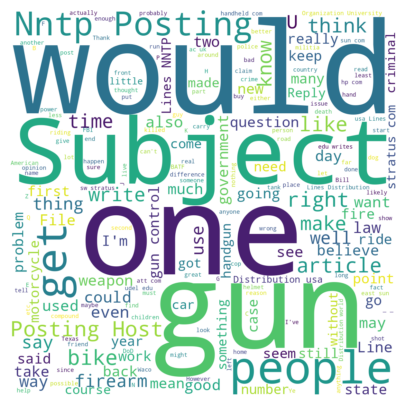

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,1)

**Word cloud of motorcycles**

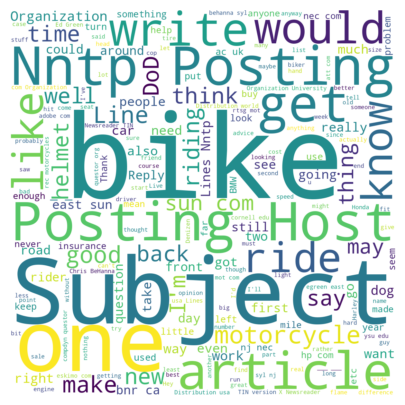

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,2)

**Showing the same word cloud from above of our text 'motorcycle' with the shape of a motorcycle**

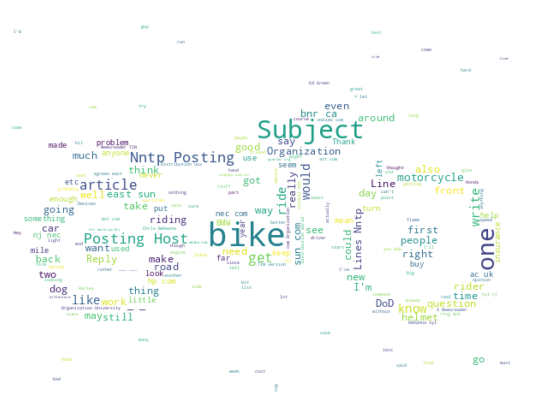

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,3)

**Word cloud of guns**

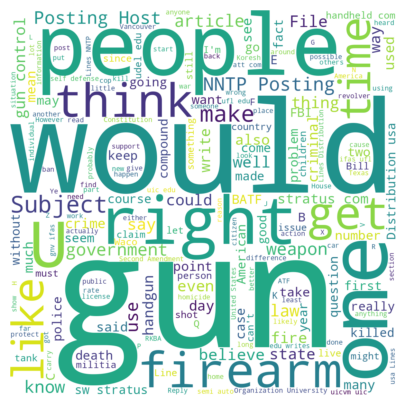

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,4)

**Word cloud of guns with the shape of gun**

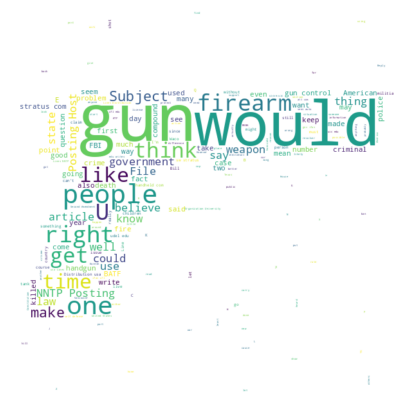

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,5)

**Histogram of the amount of words in relation to the texts.**

This is a normal histogram that shows the amount of words in relation to the texts. Here, by default, we got 10 bins, without defining a minimum and maximum range to be displayed.
The goal: to see the graph in a clean way to know how to change certain things.

In [ ]:
!pip install Pillow

In [ ]:
def choosing_histogram_ofWordCount(df,N, range=0, bin=10):
  if range == 0:
    range = df['Words_Count'].max()
  if N==1: #defult hist
    plt.figure(figsize=(10, 6))
    df['Words_Count'].hist(color='blue', alpha=0.7)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Histogram of Words_Count')
    plt.show()
  elif N==2: #hist with the changing of the range
    bin_range = (0, range)
    plt.figure(figsize=(10, 6))
    newsgroups_df['Words_Count'].hist(color='blue', alpha=0.7,range = bin_range)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Histogram of Words_Count')
    plt.show()
  elif N==3: #hist with the changing of the range and the bins
    bin_range = (0, range)
    plt.figure(figsize=(10, 6))
    newsgroups_df['Words_Count'].hist(bins=bin, color='blue', alpha=0.7, range=bin_range)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.title('Histogram of Words_Count')
    plt.show()

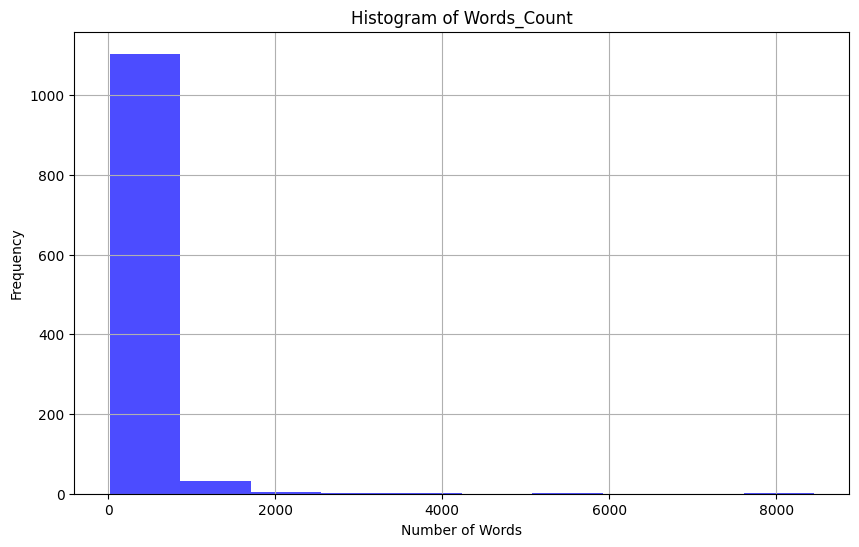

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,1)

The width of the bins is equal and calculated according to the formula:

In [ ]:
def bins_width(df, bins_count, col):
  return (df[col].max() - df[col].min())/bins_count

bins_width(newsgroups_df,10, 'Words_Count')
#10 is default

843.3

At this stage we reduced the range of numbers of the X-axis from 0 to 2000. This is because most of our texts are in the area of under 2000 words and we want to clearly see the graph.

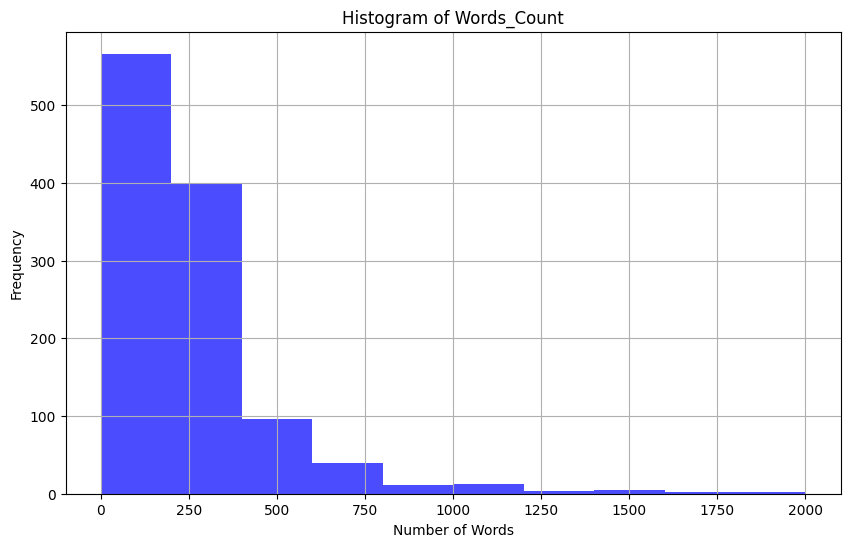

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df, 2, 2000)

At this point, we changed the number of bins to 20. This is in order to see a wider distribution of bins to observe the data more clearly.

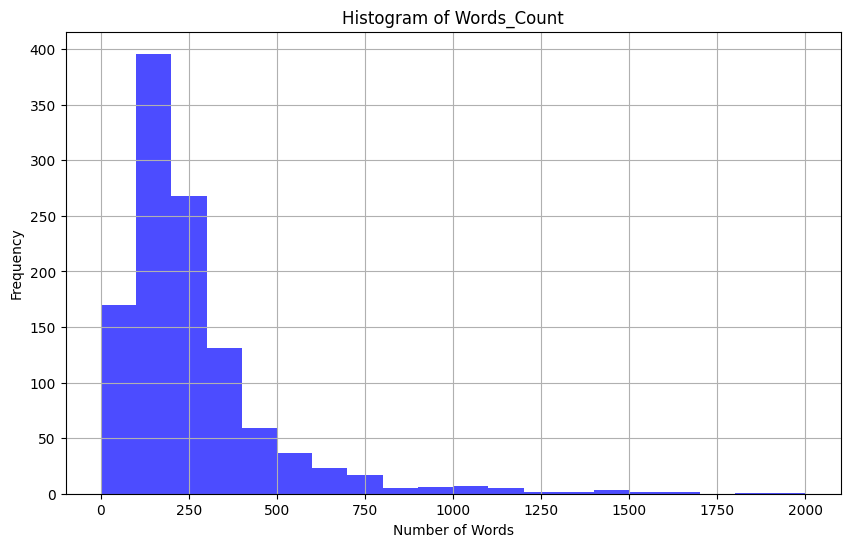

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df, 3, 2000, 20)

The new width of the bins:

In [ ]:
bins_width(newsgroups_df, 20, 'Words_Count')

421.65

**Histogram of the amount of characters in relation to the texts.**

This is a normal histogram that shows the amount of  characters in relation to the texts. Here, by default, we got 10 bins, without defining a minimum and maximum range to be displayed. The goal: to see the graph in a clean way to know how to change certain things.

In [ ]:
def choosing_histogram_numOfCharacters(df, N, range=0, bin=10):
  if range == 0:
    range = df['Length'].max()
  if N==1: #regular graph without any change
    plt.figure(figsize=(10, 6))
    newsgroups_df['Length'].hist(color='green', alpha=0.7)
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    plt.title('Histogram of Characters_Count')
    plt.show()
  elif N==2: #grpah with the change of range
    bin_range = (0, range)
    plt.figure(figsize=(10, 6))
    newsgroups_df['Length'].hist(color='green', alpha=0.7,range=bin_range)
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    plt.title('Histogram of Characters_Count')
    plt.show()
  elif N==3: #graph with the change of range and bins
    bin_range = (0, range)
    plt.figure(figsize=(10, 6))
    newsgroups_df['Length'].hist(bins=bin, color='green', alpha=0.7,range=bin_range)
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    plt.title('Histogram of Characters_Count')
    plt.show()

The amount of characters is relevant to understanding the type of text. Texts with a large amount of characters may suggest an article that tries to explain things to us. A low amount may imply a text with a concise meaning and a desire not to "dig" such as a WhatsApp or Twitter message.

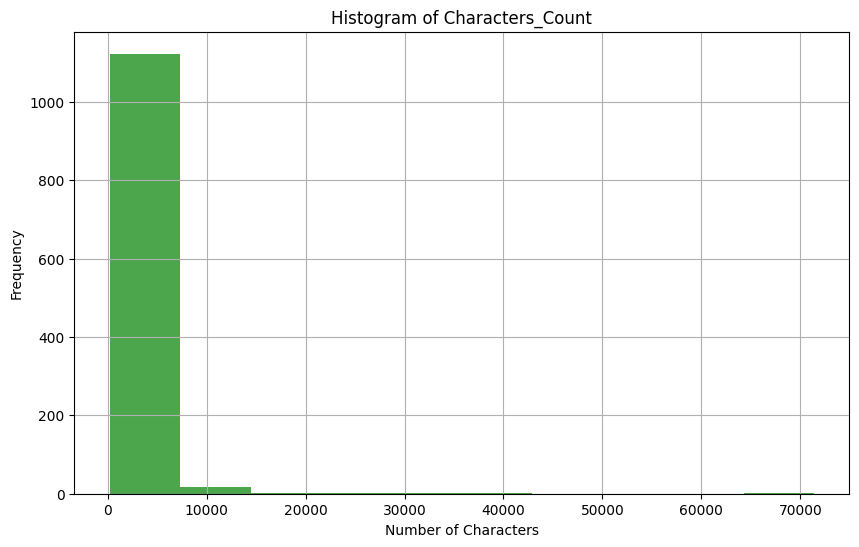

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,1)

The width of the bins is equal:

In [ ]:
bins_width(newsgroups_df,10, 'Length')
#10 is default

7120.8

At this stage we reduced the range of numbers of the X-axis from 0 to 10000. This is because most of our texts are in the area of under 10000 characters and we want to clearly see the graph.

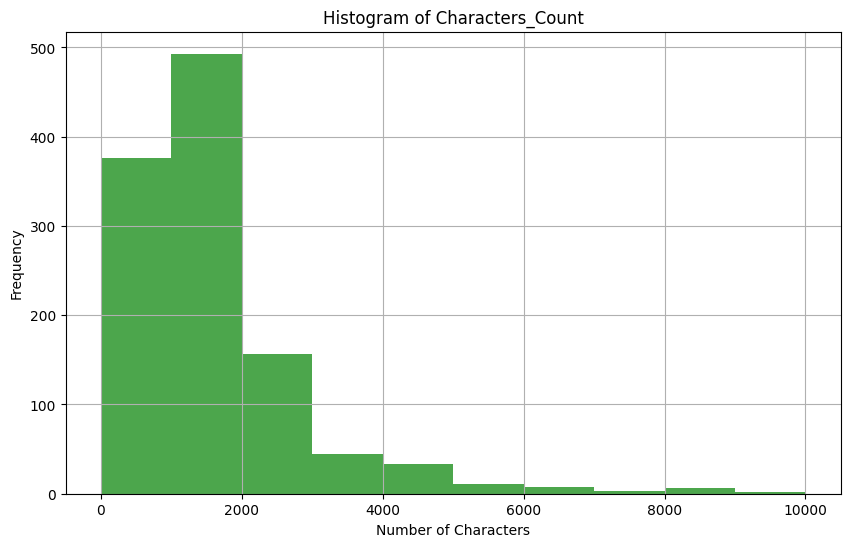

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,2,10000)

At this point, we changed the number of bins to 20. This is in order to see a wider distribution of bins to observe the data more clearly.

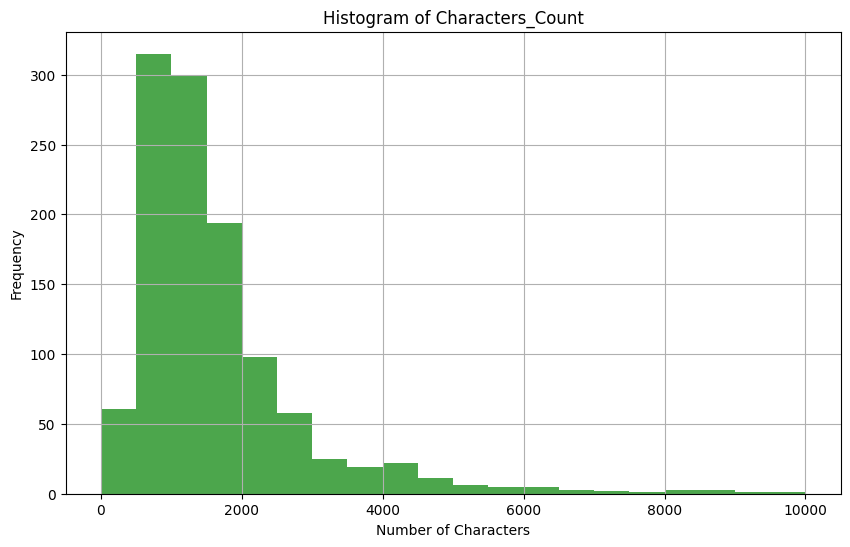

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,3,10000, 20)

The new width of the bins:

In [ ]:
bins_width(newsgroups_df,20,'Length')

3560.4

**Showing Tree Map of top20 frequencies words in our data, choosing 20 different colors to display the differnce**

In [ ]:
def tree_map_func():
  colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939',
    '#8ca252', '#b5cf6b', '#cedb9c', '#8c6d31', '#bd9e39'
]
  sns.set_style(style="whitegrid")
  top20 = top_or_least_N_common(newsgroups_df,20)
  label = top20.index
  sizes = top20.values
  squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Treemap with Squarify')
  plt.axis('off')
  plt.show()
tree_map_func()

**We run the sentiment analysis histogram for all the data for get some information about our texts, if they are negative or positive by their content**

In [ ]:
def choosing_Sentiment(df, N):
  if N==1:
    df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.hist(df['sentiment'], bins=30, color='green', alpha=0.7)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.title('Sentiment Analysis Histogram')
    plt.show()

  elif N==2:
    plt.hist(df[df['target'] == 'talk.politics.guns']['sentiment'], bins=30, color='green', alpha=0.7)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.title('Sentiment Analysis Histogram')
    plt.show()

  elif N==3:
    plt.hist(df[df['target'] == 'rec.motorcycles']['sentiment'], bins=30, color='green', alpha=0.7)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.title('Sentiment Analysis Histogram')
    plt.show()

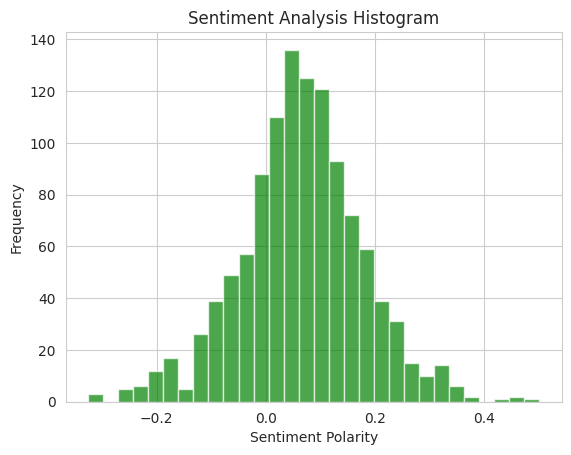

In [ ]:
choosing_Sentiment(newsgroups_df,1)

Conclusion: we recived the almost equal relation for the texts.

**We choose to seperate our data because we want to understand which kind of texts is the negative. we choose run the sentiment analysis histogram for guns data for get some information about our text.**

In [ ]:
choosing_Sentiment(newsgroups_df,2)

Conclusion: Still stay almost equal.

**We choose to seperate our data because we want to understand which kind of texts is the negative. we choose run the sentiment analysis histogram for motorcycles data for get some information about our text.**

In [ ]:
choosing_Sentiment(newsgroups_df,3)

Conclusion: Stay almost equal.

update the data we changed, it relevant cause we using Words_Count and Length columns at using functions of vizoaluzation

In [ ]:
def update_wordCount_and_Length():
  newsgroups_df['Words_Count'] = newsgroups_df['text'].apply(lambda x: len(x.split()))
  newsgroups_df['Length'] = newsgroups_df['text'].str.len()


**Converting uppercase letters to lowercase**

In [ ]:
newsgroups_df['text'] = newsgroups_df['text'].str.lower()
newsgroups_df


text              target  \
0     from: sturges@oasys.dt.navy.mil (richard sturg...     rec.motorcycles   
1     from: jonc@joncpc.sandiego.ncr.com (mike corco...     rec.motorcycles   
2     from: tomgift@uxa.cso.uiuc.edu (tom gift)\nsub...  talk.politics.guns   
3     from: arnie@magnus.acs.ohio-state.edu (arnie s...     rec.motorcycles   
4     from: ron@hpfcso.fc.hp.com (ron miller)\nsubje...  talk.politics.guns   
...                                                 ...                 ...   
1139  subject: re: washington state\nfrom: kim39@scw...  talk.politics.guns   
1140  from: cjackson@adobe.com (curtis jackson)\nsub...     rec.motorcycles   
1141  from: tony@morgan.demon.co.uk (tony kidson)\ns...     rec.motorcycles   
1142  from: cdt@sw.stratus.com (c. d. tavares)\nsubj...  talk.politics.guns   
1143  from: zed@dartmouth.edu (ted schuerzinger)\nsu...  talk.politics.guns   

      Length  Words_Count  number_of_letters  mean_word_length  \
0       2134          325               1558          5.372308   
1       1087          171                756          5.204678   
2        382           51                308          6.333333   
3       1521          252               1181          4.988095   
4        842          143                638          4.769231   
...      ...          ...                ...               ...   
1139     680           85                515          6.917647   
1140    1034          160                766          5.400000   
1141     945          111                516          7.126126   
1142    7219         1235               5567          4.714980   
1143    1764          318               1293          4.411950   

      stopwords_count  numeric_count  count_of_#  count_of_@  count_of_>  \
0                 136             23           0           3          11   
1                  60             58           0           4          11   
2                  12              2           0           3           1   
3                 116             25           0           3           8   
4                  57              6           0           2          13   
...               ...            ...         ...         ...         ...   
1139               28             43           0           5           8   
1140               54             52           1           4           1   
1141               30             58           1           7           3   
1142              549             63           0           5          56   
1143              129             33           0           5          37   

      count_of_-  all_capital_words_count  sentiment  
0              7                        6   0.138681  
1              6                        6   0.099874  
2              0                        5   0.144444  
3             14                       12   0.161785  
4              1                        1   0.003333  
...          ...                      ...        ...  
1139           3                        2   0.098611  
1140           7                        6   0.036103  
1141         145                        3   0.124826  
1142          46                       35   0.123729  
1143          10                       56   0.065508  

[1144 rows x 14 columns]

**Showing the word clouds with the change of lower lettters**

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,1)

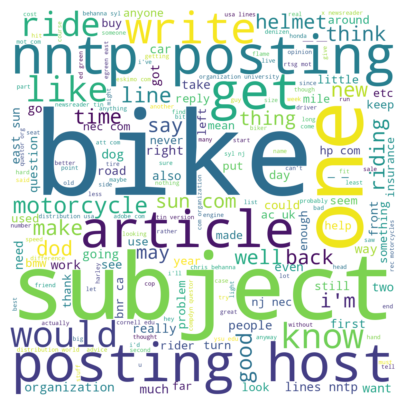

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,2)

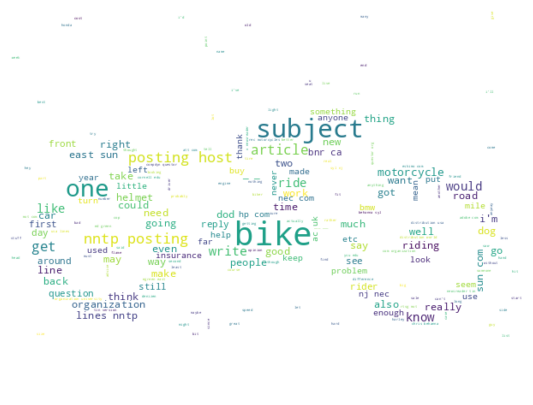

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,3)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,4)

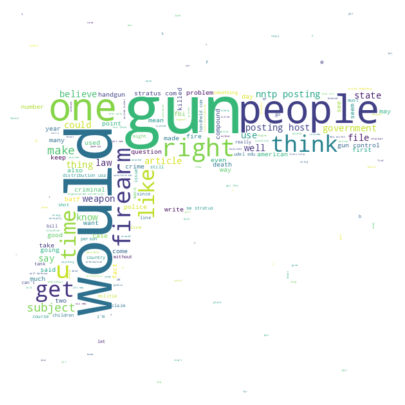

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,5)

**Showing tree map with the changes after lower**

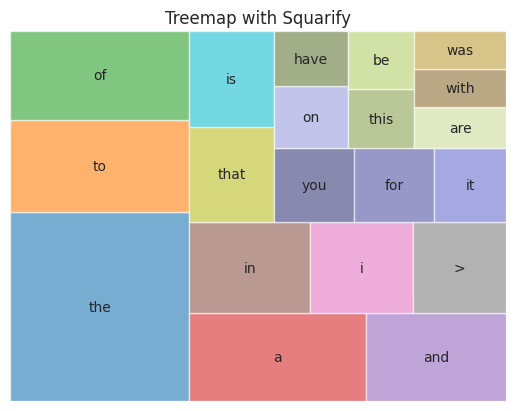

In [ ]:
tree_map_func()

tree map changed after lower

**Showing the changes after lower in count of words**

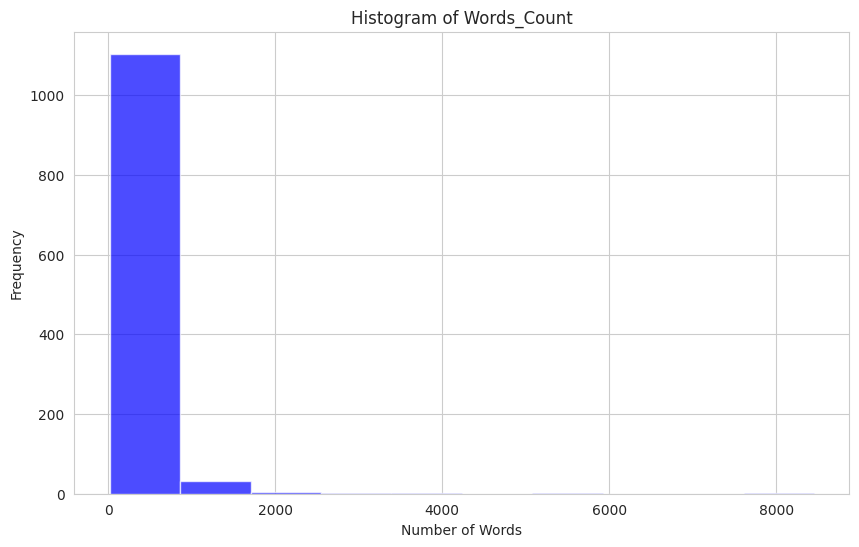

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,1)

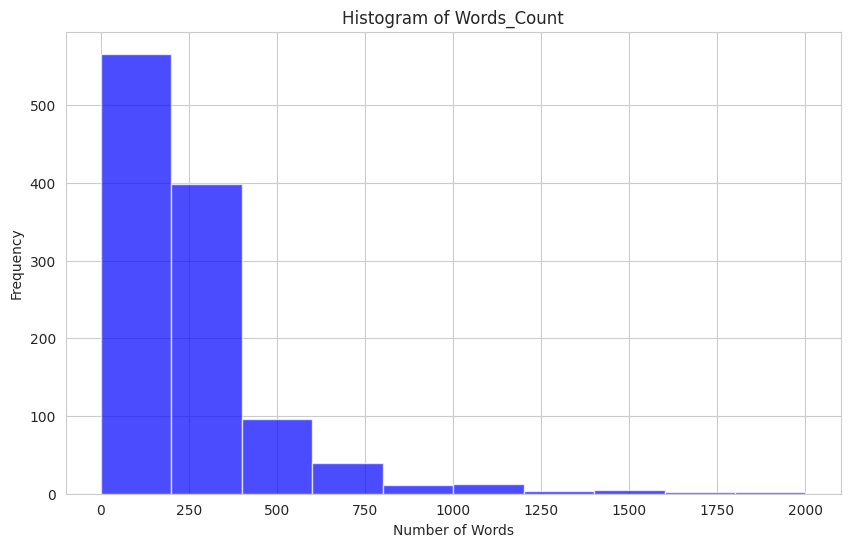

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,2,2000)

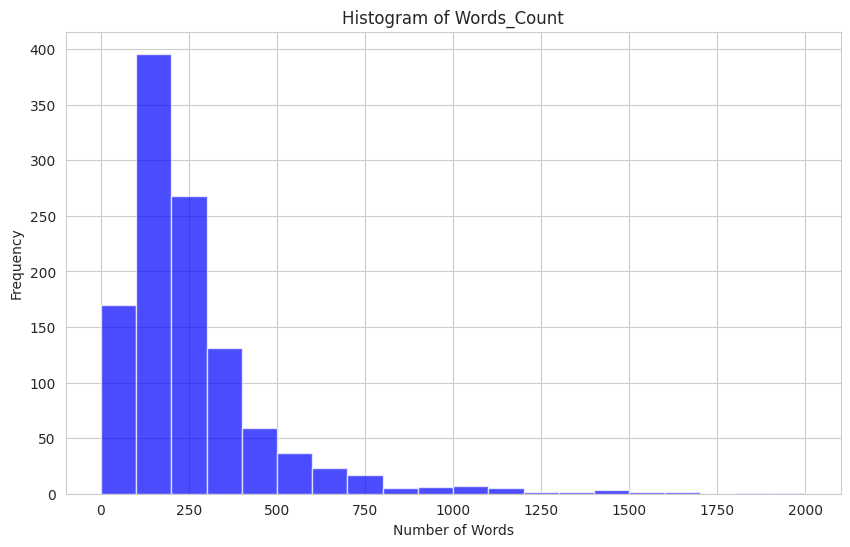

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,3,2000,20)

**Showing letters vs texts after lower**


In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,1)

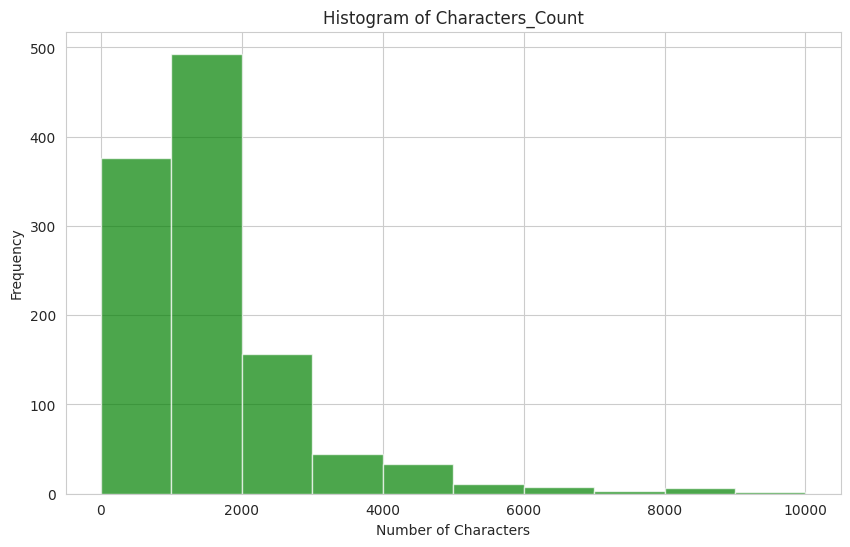

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,2,10000)

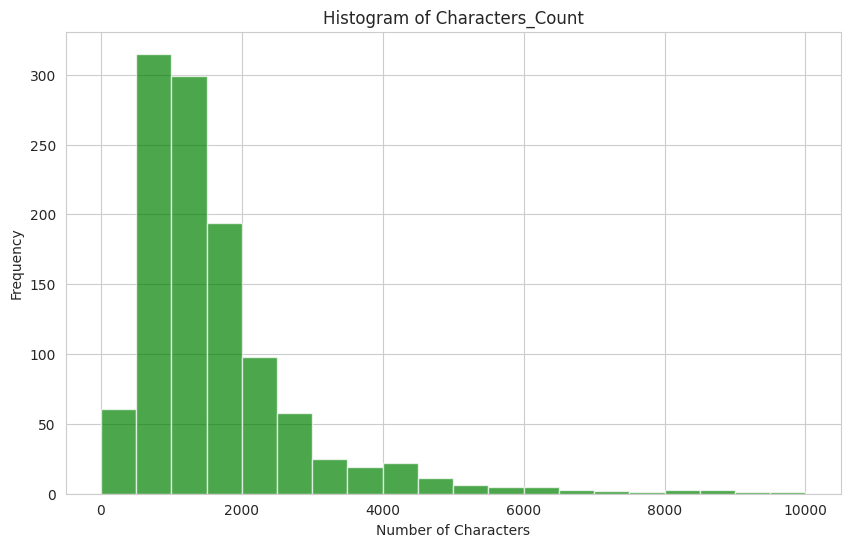

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,3,10000,20)

**Sentement after lower**

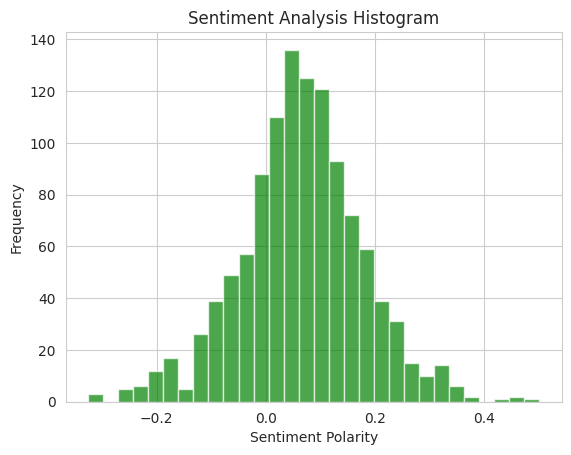

In [ ]:
choosing_Sentiment(newsgroups_df,1)

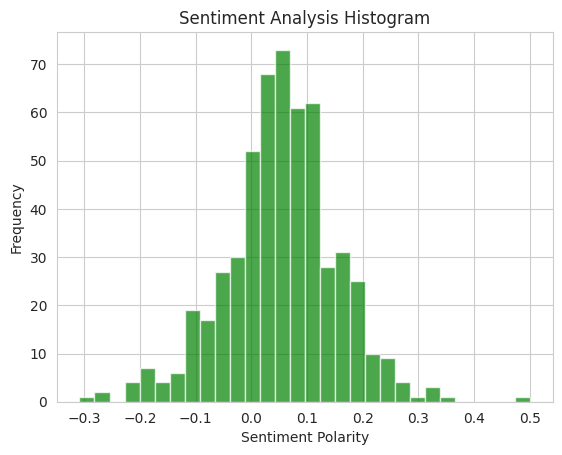

In [ ]:
choosing_Sentiment(newsgroups_df,2)

In [ ]:
choosing_Sentiment(newsgroups_df,3)

**Removing special characters and punctuation marks**

In [ ]:
def becomeOnlyLetters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def deleteEmail(text):
  return re.sub(r'[^\s]@[\s].[\s]','',text)
newsgroups_df['text'] = newsgroups_df['text'].apply(deleteEmail)
newsgroups_df['text'] = newsgroups_df['text'].apply(becomeOnlyLetters)
newsgroups_df







text              target  \
0     from sturgesoasysdtnavymil richard sturges\nsu...     rec.motorcycles   
1     from joncjoncpcsandiegoncrcom mike corcoran\ns...     rec.motorcycles   
2     from tomgiftuxacsouiucedu tom gift\nsubject re...  talk.politics.guns   
3     from arniemagnusacsohiostateedu arnie skurow\n...     rec.motorcycles   
4     from ronhpfcsofchpcom ron miller\nsubject re b...  talk.politics.guns   
...                                                 ...                 ...   
1139  subject re washington state\nfrom kim39scws8ha...  talk.politics.guns   
1140  from cjacksonadobecom curtis jackson\nsubject ...     rec.motorcycles   
1141  from tonymorgandemoncouk tony kidson\nsubject ...     rec.motorcycles   
1142  from cdtswstratuscom c d tavares\nsubject re t...  talk.politics.guns   
1143  from zeddartmouthedu ted schuerzinger\nsubject...  talk.politics.guns   

      Length  Words_Count  number_of_letters  mean_word_length  \
0       2134          325               1558          5.372308   
1       1087          171                756          5.204678   
2        382           51                308          6.333333   
3       1521          252               1181          4.988095   
4        842          143                638          4.769231   
...      ...          ...                ...               ...   
1139     680           85                515          6.917647   
1140    1034          160                766          5.400000   
1141     945          111                516          7.126126   
1142    7219         1235               5567          4.714980   
1143    1764          318               1293          4.411950   

      stopwords_count  numeric_count  count_of_#  count_of_@  count_of_>  \
0                 136             23           0           3          11   
1                  60             58           0           4          11   
2                  12              2           0           3           1   
3                 116             25           0           3           8   
4                  57              6           0           2          13   
...               ...            ...         ...         ...         ...   
1139               28             43           0           5           8   
1140               54             52           1           4           1   
1141               30             58           1           7           3   
1142              549             63           0           5          56   
1143              129             33           0           5          37   

      count_of_-  all_capital_words_count  sentiment  
0              7                        6   0.138681  
1              6                        6   0.099874  
2              0                        5   0.144444  
3             14                       12   0.161785  
4              1                        1   0.003333  
...          ...                      ...        ...  
1139           3                        2   0.098611  
1140           7                        6   0.036103  
1141         145                        3   0.124826  
1142          46                       35   0.123729  
1143          10                       56   0.065508  

[1144 rows x 14 columns]

In [ ]:
update_wordCount_and_Length()

**word clouds after lower+only letters**

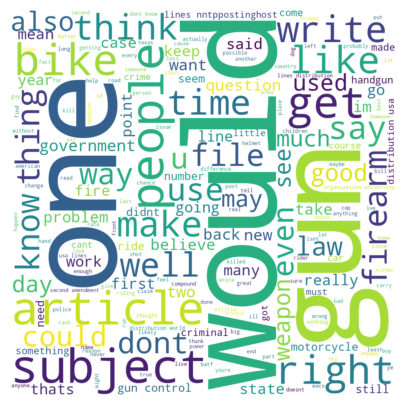

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,1)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,2)

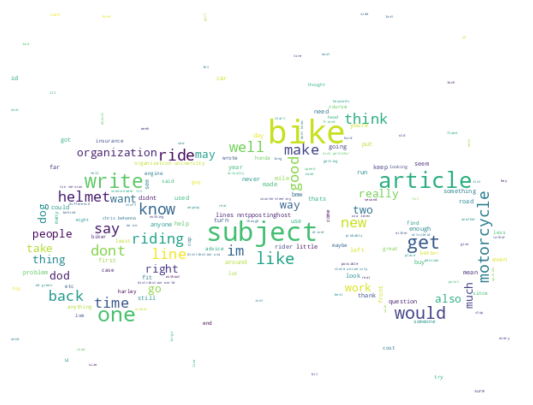

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,3)

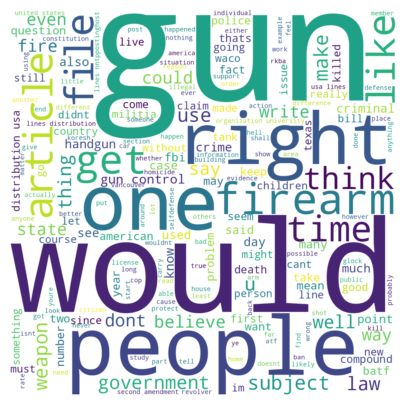

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,4)

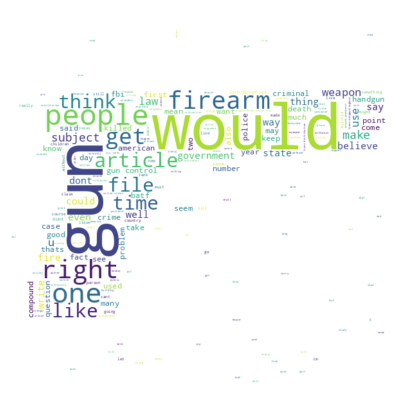

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,5)

**tree map after lower+only letters**

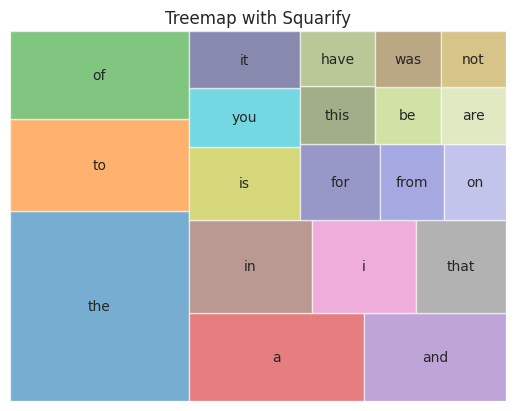

In [ ]:
tree_map_func()

tree map has changed because the count of words has chenged

**word count graph after lower+only letters**

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,1)

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,2,2000)

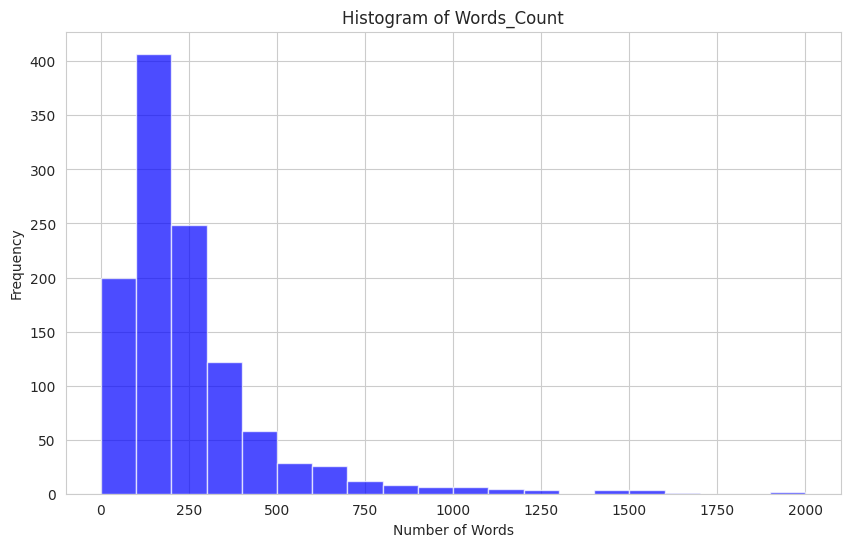

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,3,2000,20)

we can see that the histogram of words count has changed

**characters after lower+only letters**

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,1)

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,2,10000)

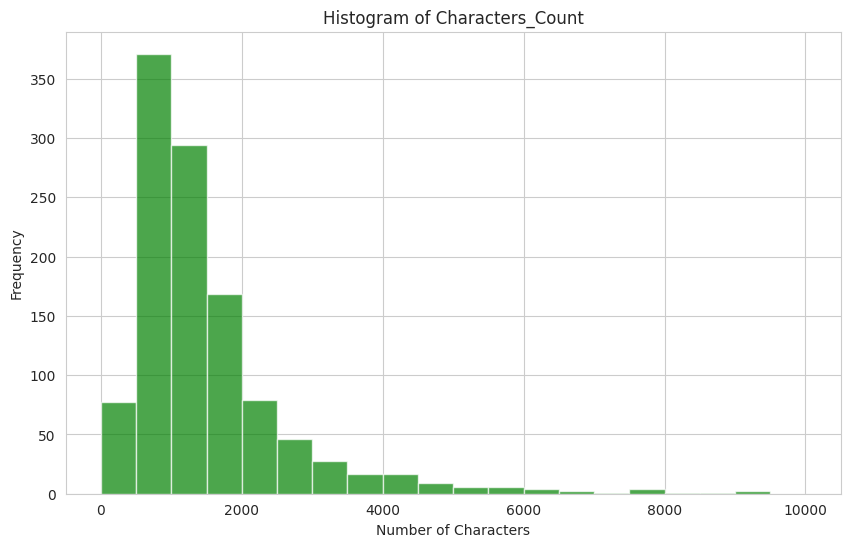

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,3,10000,20)

we can see that hehistogram of characters has changed

**sentiment after lower + only letters**

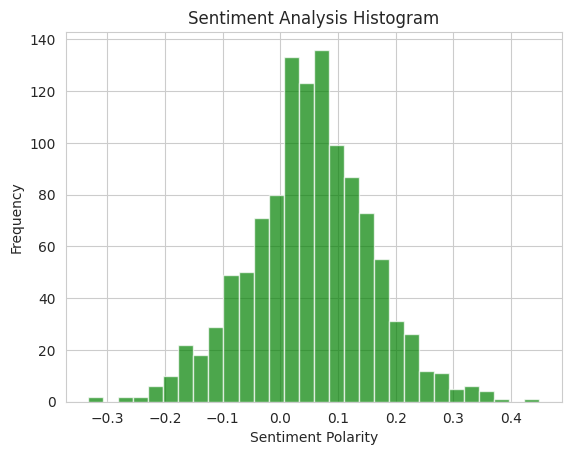

In [ ]:
choosing_Sentiment(newsgroups_df,1)

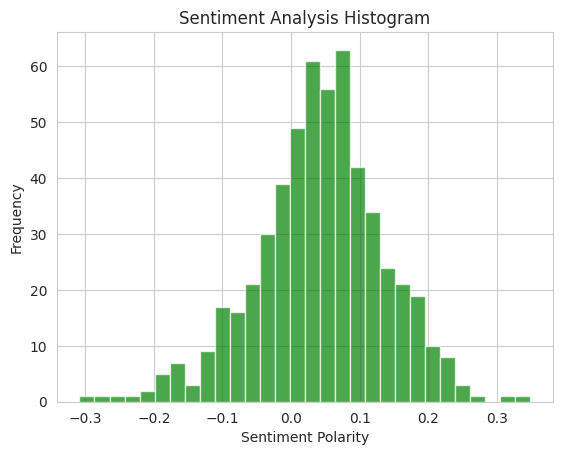

In [ ]:
choosing_Sentiment(newsgroups_df,2)

in sentiment of gun, we can see there is increse of positive text

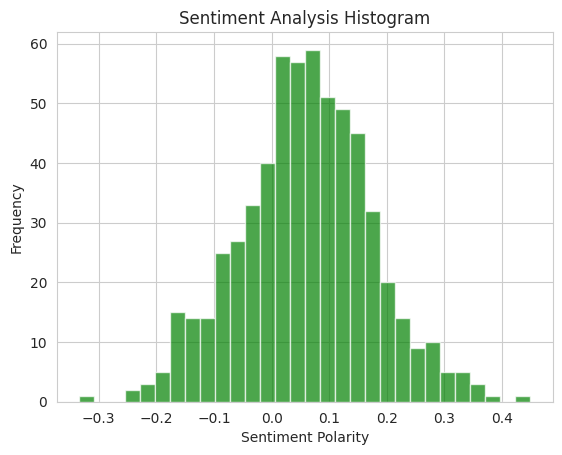

In [ ]:
choosing_Sentiment(newsgroups_df,3)

**Removing stopwords**



In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
newsgroups_df['text'] = newsgroups_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in
stop))


In [ ]:
update_wordCount_and_Length()

**word cloud after lower+onlyletter+remove stopwords**

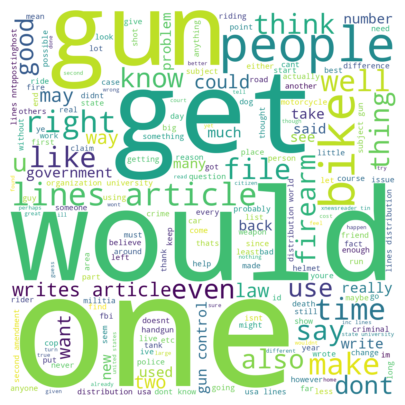

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,1)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,2)

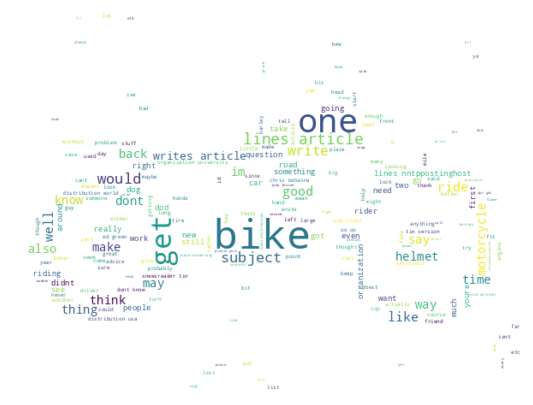

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,3)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,4)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,5)

some words are not apper like: subject
others word bigger like: bike

**tree map after lower+onlyletter+remove stopwords**

In [ ]:
tree_map_func()

After removing stopwords, lots of words entered the tree map


**words count vs texts after lower+onlyletter+remove stopwords**

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,1)

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,2,2000)

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,3,2000,20)

we can see that thehistogram of words count has changed because removing stopwords

**charactets count vs texts after lower+onlyletter+remove stopwords**

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,1)

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,2,10000)

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,3,10000,20)

we can see that thehistogram of  characters count has changed because removing stopwords

**Sentiment after lower+onlyletter+remove stopwords**

In [ ]:
choosing_Sentiment(newsgroups_df,1)

In [ ]:
choosing_Sentiment(newsgroups_df,2)

In [ ]:
choosing_Sentiment(newsgroups_df,3)

We decided to remove all words with at least 1000 repetitions. The reason for this is that we have 1144 entries, if a word appears over 1000 times, then it appears in the vast majority of texts and it will simply take up space in our dictionary without benefit (in the case of query, the relevant texts will still be accepted according to the rest of the sentence).

In [ ]:
top10_freq2 = top_or_least_N_common(newsgroups_df,10)
top10_freq2

Even before the removal, you can see that the following 10 words make more sense than the words we received in part 1 of the work (here there are much less stopwords)

In [ ]:
word_frequencies = pd.Series(' '.join(newsgroups_df['text']).split()).value_counts()
words_to_replace = word_frequencies[word_frequencies > 1000].index.tolist()
newsgroups_df['text'] = newsgroups_df['text'].apply(lambda x: ' '.join(['' if word in words_to_replace else word for word in x.split()]))



After the removal, we can see that there are no more words whose frequency is over 1000.

In [ ]:
top10_freq3 = top_or_least_N_common(newsgroups_df,10)
top10_freq3

We will remove the word "gun" belonging to our chosen topic "talk.politics.guns" even though it is not a stop word that should be removed and it is not over 1000 in frequency. It appears in most texts and provides information about them, but we decided to remove it because then it will simply take up space in our dictionary and is useless (in the case of a query, the relevant texts will still be accepted according to the rest of the sentence).

In [ ]:
newsgroups_df['text'] = newsgroups_df['text'].apply(lambda x: ' '.join(['' if 'gun' in word.lower() else word for word in x.split()]))

In [ ]:
newsgroups_df['text'].str.contains('gun', case=False)




In [ ]:
update_wordCount_and_Length()

**word cloud after lower+onlyletter++remove_stopwords+remove frequencies**

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,1)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,2)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,3)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,4)

'gun' is note apper

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,5)

the words we remove are not apper such as: article.

**tree map after lower+onlyletter++remove_stopwords+remove frequencies**

In [ ]:
tree_map_func()

tree map has changed after remove frequencies because we remove them (like would, orgnization and more).

**word count vs texts after lower+onlyletter++remove_stopwords+remove frequencies**

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,1)

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,2,2000)

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,3,2000,20)

we can see that the histogram of words count has changed because removing 10 frequency words

**characters count vs texts after lower+onlyletter++remove_stopwords+remove frequencies**

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,1)

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,2,10000)

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,3,10000,20)

we can see that the histogram of characters count has changed because removing 10 frequency words

**word count vs texts after lower+onlyletter+remove_stopwords+remove frequencies**

In [ ]:
choosing_Sentiment(newsgroups_df,1)

In [ ]:
choosing_Sentiment(newsgroups_df,2)

Conclusion: After removing the word "gun" there was a decrease in the amount of negative texts. We removed this word to save memory and because it is negative we got an increase in the amount of positive texts (which was not desirable).
We didn't intend to change the ratio of the negative to the positive but it was expected because we removed the negative word "gun"

In [ ]:
choosing_Sentiment(newsgroups_df,3)

After the removal, we can see that there are no more words whose frequency is over 1000.

In [ ]:
top10_freq4 = top_or_least_N_common(newsgroups_df,10)
top10_freq4

In [ ]:
top10_unique2 = top_or_least_N_common(newsgroups_df,-10)
top10_unique2

Even before the removal, you can see that the following 10 words make more sense than the words we received in part 1 of the work (here there are no letters and no brackets).


In [ ]:
uniques = pd.Series(' '.join(newsgroups_df['text']).split()).value_counts()[-10:]
words_to_replace = uniques.index.tolist()
newsgroups_df['text'] = newsgroups_df['text'].apply(lambda x: ' '.join(['' if word in words_to_replace else word for word in x.split()]))

In [ ]:
update_wordCount_and_Length()

**word cloud after lower+onlyletter++remove_stopwords+remove frequencies+remove uniques**

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,1)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,2)

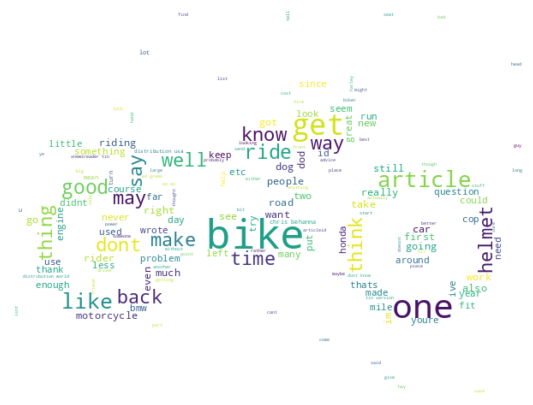

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,3)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,4)

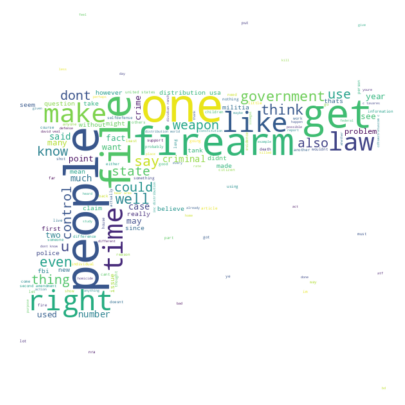

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,5)

****tree map after lower+onlyletter++remove_stopwords+remove frequencies+remove uniques****

In [ ]:
tree_map_func()

tree map has no changed

no changed cause we remove the 10 least common

****word count after lower+onlyletter++remove_stopwords+remove frequencies+remove uniques****

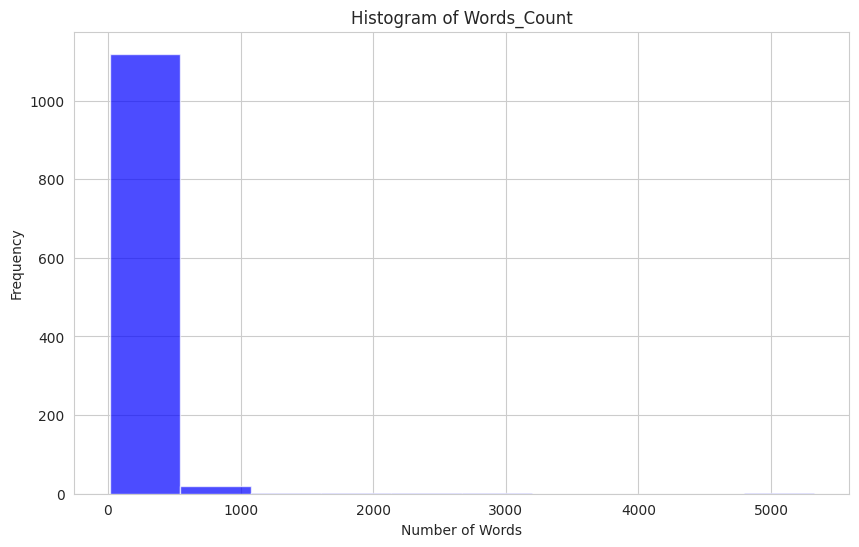

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,1)

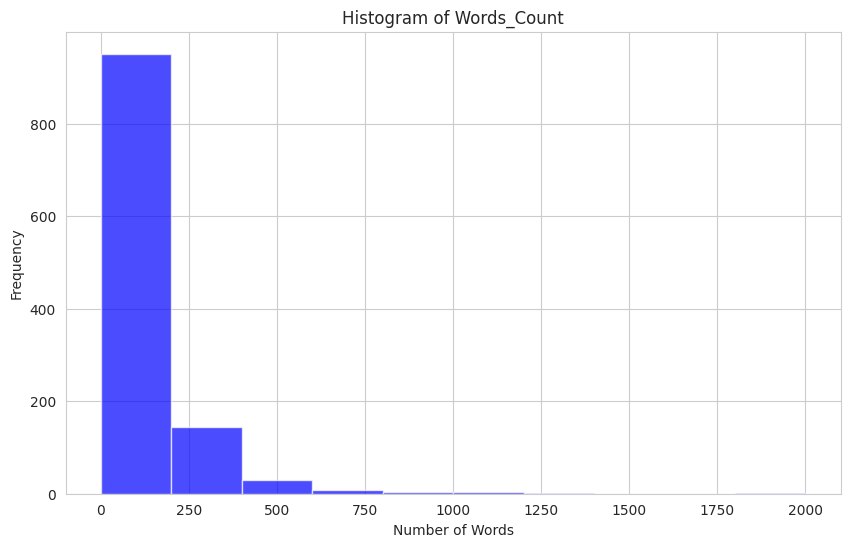

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,2,2000)

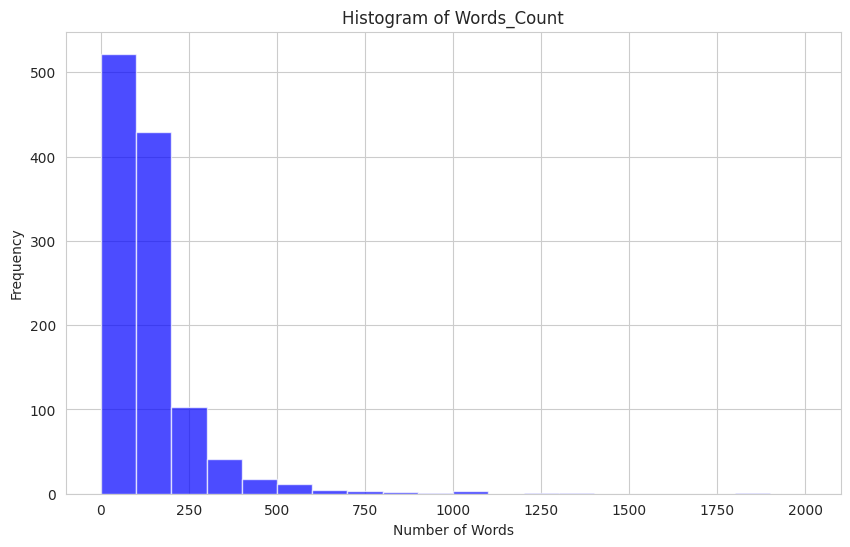

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,3,2000,20)

**characters count after lower+onlyletter++remove_stopwords+remove frequencies+remove uniques**

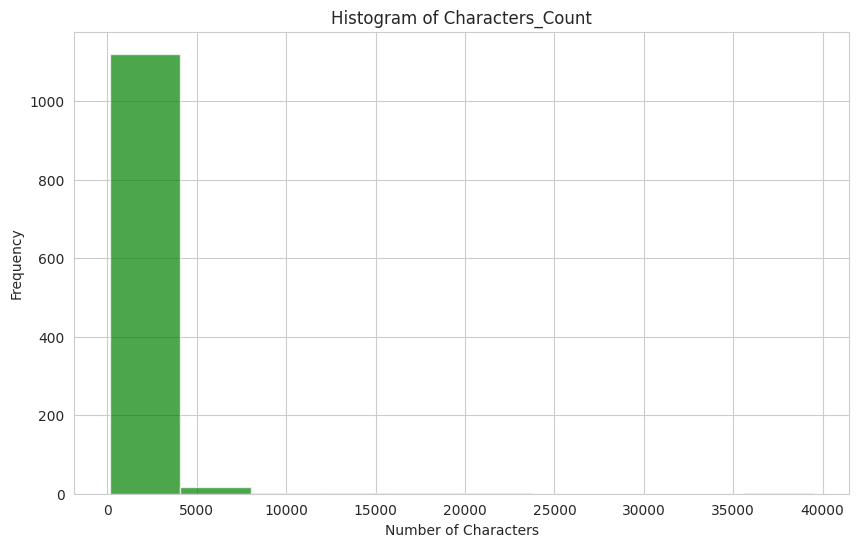

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,1)

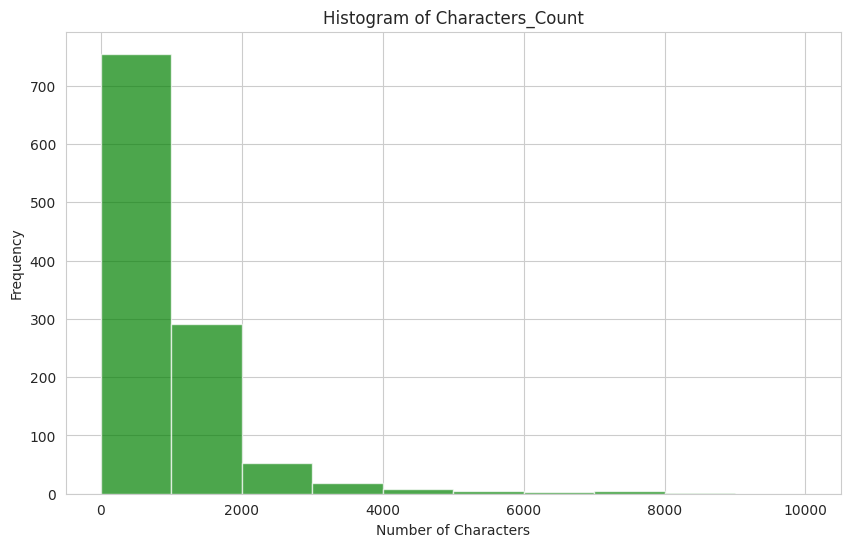

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,2,10000)

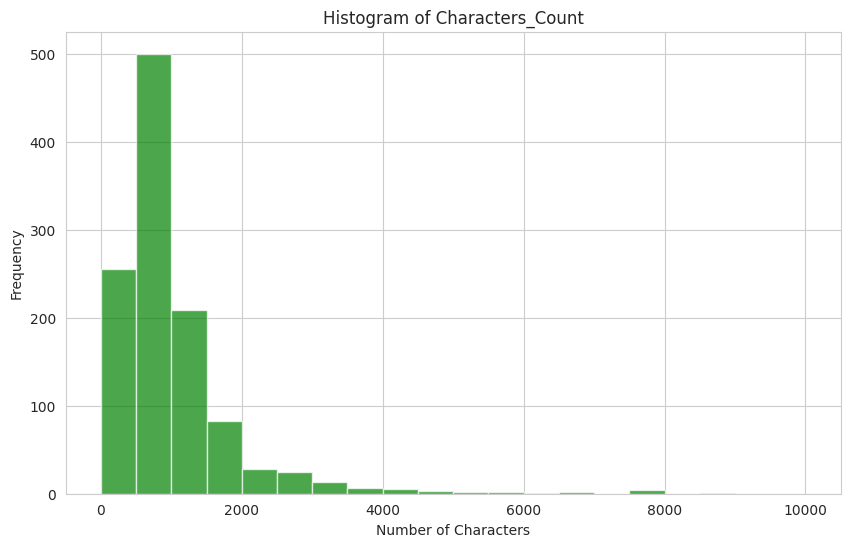

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,3,10000,20)

**Sentiment after lower+onlyletter+remove_stopwords+remove frequencies**

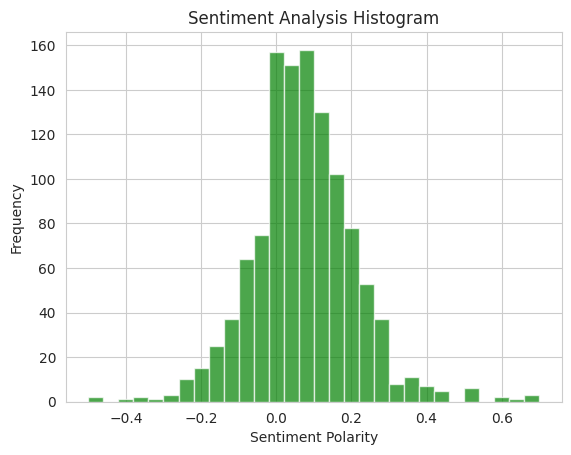

In [ ]:
choosing_Sentiment(newsgroups_df,1)

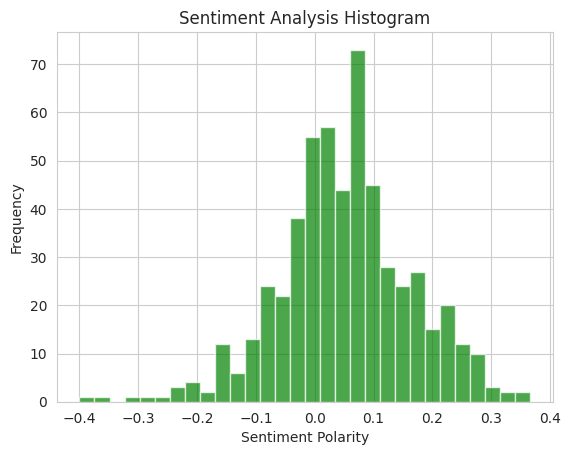

In [ ]:
choosing_Sentiment(newsgroups_df,2)

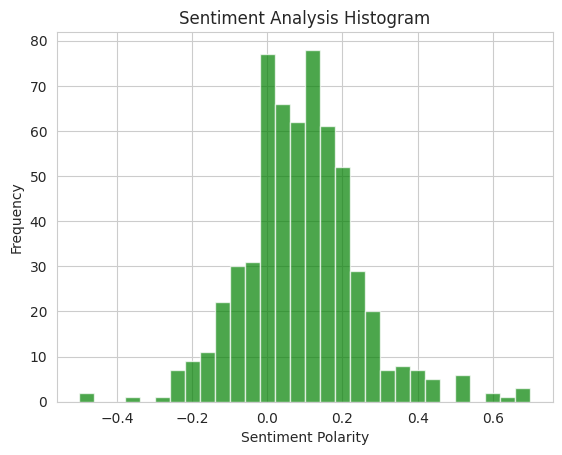

In [ ]:
choosing_Sentiment(newsgroups_df,3)

****

**Correct spelling errors**

In [ ]:
!pip install autocorrect


**Making function of speller that fixing our spelling of the texts**

In [ ]:
def speller(text):
    split_text = text.split()
    spell = Speller(lang='en')
    corrected_text = [spell(word) for word in split_text]
    return ' '.join(corrected_text)

newsgroups_df['text'] = newsgroups_df['text'].apply(speller)
newsgroups_df

In [ ]:
update_wordCount_and_Length()

****

**word cloud after lower+onlyletter++remove_stopwords+remove frequencies+remove uniques+speller**

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,1)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,2)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,3)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,4)

In [ ]:
choosing_WordCloud_byInteger(newsgroups_df,5)

**tree map after lower+onlyletter++remove_stopwords+remove frequencies+remove uniques+speller**

In [ ]:
tree_map_func()

tree map no has change after sprlling

**word count vs texts after lower+onlyletter++remove_stopwords+remove frequencies+remove uniques+speller**

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,1)

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,2,2000)

In [ ]:
choosing_histogram_ofWordCount(newsgroups_df,3,2000,20)

There is no change in the histogram

**characters count vs texts after lower+onlyletter++remove_stopwords+remove frequencies+remove uniques+speller**

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,1)

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,2,10000)

In [ ]:
choosing_histogram_numOfCharacters(newsgroups_df,3,10000,20)

**Sentiment after lower+onlyletter++remove_stopwords+remove frequencies+remove uniques+speller**

In [ ]:
choosing_Sentiment(newsgroups_df,1)

In [ ]:
choosing_Sentiment(newsgroups_df,2)

There has been a change on the positive side, there are fewer charges.

In [ ]:
choosing_Sentiment(newsgroups_df,3)

As we progressed through the pre-processing stages, the number of words and the length of the text changed, so we received different visualization results from stage to stage that bring us closer to a correct understanding of the data.
The results changed in the word clouds, thetree map, the histogram of the words and the histogram of the amount of characters and the sentiment graphs (the change was evident in the cement graphs for most).

**From this laboratory we learned extensive familiarity with pre-processing stages, in addition we experimented with many new bolizations that we did not know before
The visualization steps first helped us analyze the data. After the pre-processing, we ran all hollization steps again and saw significant differences in many steps compared to before the pre-processing. We came to the conclusion that the pre-processing improves our data, reduces its size, and thus the analysis by the voilization is more correct and more relevant for us. It is possible that the error correction step is unnecessary because textBlob gives an accuracy of 70%, this accuracy is not high enough and sometimes not worth the running time of the speller .**

In [ ]:
!jupyter nbconvert --to html 315619098_322934555_work1.ipynb